<a href="https://www.kaggle.com/code/sanyabochoun/countrywise-covid-cases-by-sanya-001?scriptVersionId=121398628" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countrywise-covid-cases/Country-wise-COVID-cases.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
data_covid = pd.read_csv("/kaggle/input/countrywise-covid-cases/Country-wise-COVID-cases.csv")
data_covid.head()

,Country Name,Total Infected,Total Deaths,Total Recovered,Death %,Recovered %
0,USA,47916190,783565,37918301.0,1.6,79.1
1,India,34447536,463655,33849785.0,1.3,98.3
2,Brazil,21957967,611318,21151342.0,2.8,96.3
3,UK,9561099,142898,7825200.0,1.5,81.8
4,Russia,9109094,256597,7812557.0,2.8,85.8


In [4]:
data_covid.shape

(212, 6)

In [5]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     212 non-null    object 
 1   Total Infected   212 non-null    int64  
 2   Total Deaths     212 non-null    int64  
 3   Total Recovered  211 non-null    float64
 4   Death %          212 non-null    float64
 5   Recovered %      212 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 10.1+ KB


In [6]:
data_covid.isnull().sum()

Country Name       0
Total Infected     0
Total Deaths       0
Total Recovered    1
Death %            0
Recovered %        0
dtype: int64

In [7]:
missing_count = data_covid.isnull().sum()
missing_count

Country Name       0
Total Infected     0
Total Deaths       0
Total Recovered    1
Death %            0
Recovered %        0
dtype: int64

In [8]:
total_cell = np.product(data_covid.shape)
total_missing = missing_count.sum()
missing_percent = total_missing * 100 / total_cell

print("Total cells: {}".format(total_cell))
print("Total Missing Values: {}".format(total_missing))
print("Missing Values: {} %".format(missing_percent.round(3)))

Total cells: 1272
Total Missing Values: 1
Missing Values: 0.079 %


In [9]:
data_covid.dropna(inplace = True)
data_covid.head

<bound method NDFrame.head of          Country Name  Total Infected  Total Deaths  Total Recovered  Death %  \
0                 USA        47916190        783565       37918301.0      1.6   
1               India        34447536        463655       33849785.0      1.3   
2              Brazil        21957967        611318       21151342.0      2.8   
3                  UK         9561099        142898        7825200.0      1.5   
4              Russia         9109094        256597        7812557.0      2.8   
..                ...             ...           ...              ...      ...   
206             Palau               8             0              8.0      0.0   
207           Vanuatu               6             1              3.0     16.7   
208  Marshall Islands               4             0              4.0      0.0   
209             Samoa               3             0              3.0      0.0   
210        Micronesia               1             0              1.0      0.0  

In [10]:
data_covid.isnull().sum()

Country Name       0
Total Infected     0
Total Deaths       0
Total Recovered    0
Death %            0
Recovered %        0
dtype: int64

In [11]:
percent_death = data_covid[["Country Name","Death %"]].sort_values(by="Death %", ascending=False)[:10]
percent_death

,Country Name,Death %
172,Yemen,19.4
207,Vanuatu,16.7
205,Western Sahara,10.0
21,Peru,9.1
129,Sudan,7.7
14,Mexico,7.6
60,Ecuador,6.3
125,Syria,5.8
142,Somalia,5.7
79,Egypt,5.7


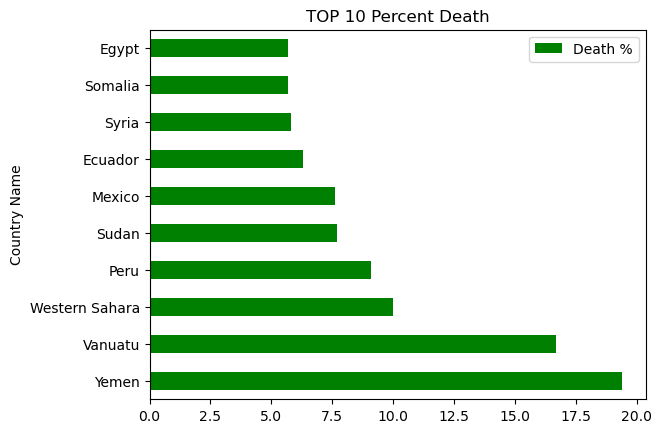

In [12]:
percent_death[:10].plot(kind='barh', x='Country Name', y='Death %',color='green',title='TOP 10 Percent Death');

In [13]:
top_Deaths = data_covid[["Country Name","Total Deaths"]].sort_values(by="Total Deaths", ascending=False)[:10]
top_Deaths

,Country Name,Total Deaths
0,USA,783565
2,Brazil,611318
1,India,463655
14,Mexico,291147
4,Russia,256597
21,Peru,200635
13,Indonesia,143670
3,UK,142898
12,Italy,132775
7,Iran,128272


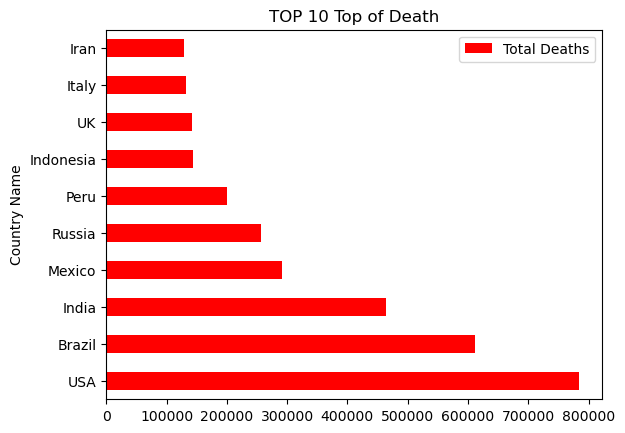

In [14]:
top_Deaths[:10].plot(kind='barh', x='Country Name', y='Total Deaths',color='red',title='TOP 10 Top of Death');

In [15]:
less_deaths = data_covid[["Country Name","Total Deaths"]].sort_values(by="Total Deaths", ascending=True)[:10]
less_deaths

,Country Name,Total Deaths
210,Micronesia,0
208,Marshall Islands,0
206,Palau,0
204,Solomon Islands,0
202,Macao,0
209,Samoa,0
199,Greenland,0
207,Vanuatu,1
205,Western Sahara,1
203,Montserrat,1


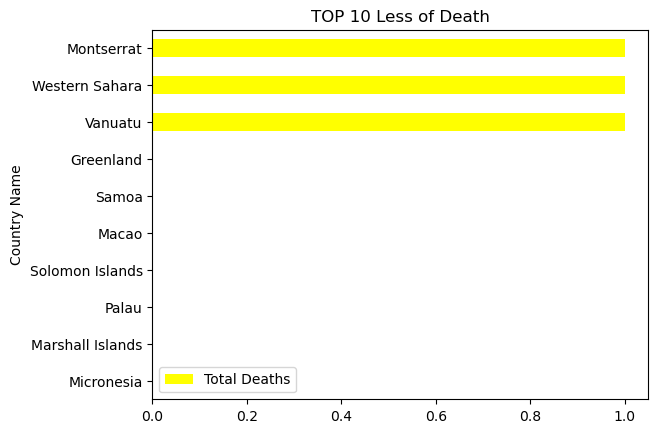

In [16]:
less_deaths[:10].plot(kind='barh', x='Country Name', y='Total Deaths',color='yellow',title='TOP 10 Less of Death');

In [17]:
top_recovered = data_covid[["Country Name","Total Recovered"]].sort_values(by="Total Recovered", ascending=False)[:10]
top_recovered

,Country Name,Total Recovered
0,USA,37918301.0
1,India,33849785.0
2,Brazil,21151342.0
5,Turkey,7888959.0
3,UK,7825200.0
4,Russia,7812557.0
6,France,7009026.0
7,Iran,5708253.0
8,Argentina,5172193.0
9,Spain,4889801.0


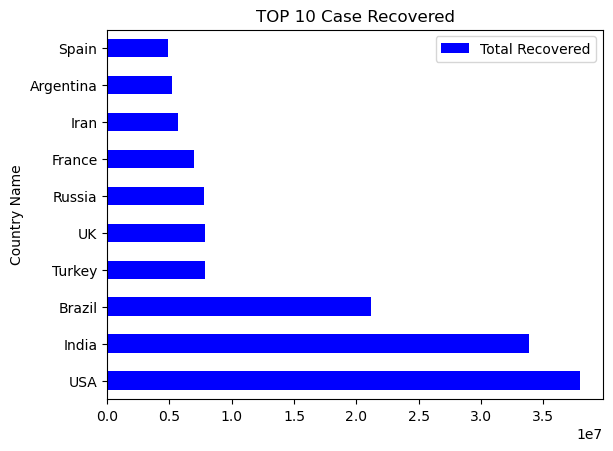

In [18]:
top_recovered[:10].plot(kind='barh', x='Country Name', y='Total Recovered',color='blue',title='TOP 10 Case Recovered');

In [19]:
fig = px.scatter_geo(data_covid, locations='Country Name',locationmode="country names",scope="world",color="Total Infected",size="Total Infected",size_max=65,title="Covid-19 Cases of Infected around the World",color_continuous_scale="turbo")
fig.show()
fig = px.scatter_geo(data_covid, locations='Country Name',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=65,title="Covid-19 Cases of death around the World",color_continuous_scale="hot")
fig.show()
fig = px.scatter_geo(data_covid, locations='Country Name',locationmode="country names",scope="world",color="Total Recovered",size="Total Recovered",size_max=65,title="Covid-19 Cases of Recovered around the World",color_continuous_scale="solar")
fig.show()